# Understand Your Data With Visualization

<i>from the book 
"Machine Learning Mastery With Python: Understand Your Data, Create Accurate Models and Work Projects End-To-End"
by Jason Brownlee, Migrated to Jupyter with additions by Mitch Sanders 5/22/2017</i>

You must understand your data in order to get the best results from machine learning algorithms.
The fastest way to learn more about your data is to use data visualization. In this section you
will discover exactly how you can visualize your machine learning data in Python using Pandas.


Recipes in this chapter use the Pima Indians onset of diabetes dataset introduced in Chapter 4.


Let’s get started.

### 6.1 Univariate Plots

In this section we will look at three techniques that you can use to understand each attribute of
your dataset independently.
-  Histograms.
-  Density Plots.
-  Box and Whisker Plots.

#### 6.1.1 Histograms

A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms
group data into bins and provide you a count of the number of observations in each bin. From
the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed
or even has an exponential distribution. It can also help you see possible outliers.


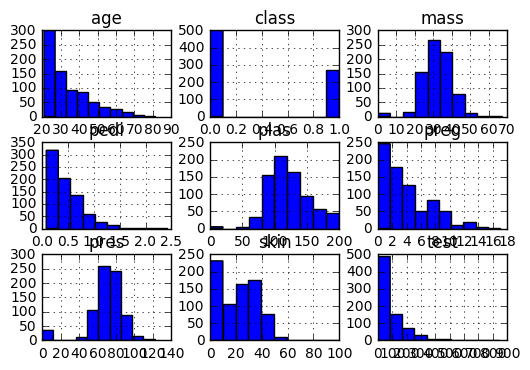

In [4]:
# Univariate Histograms
from matplotlib import pyplot
from pandas import read_csv
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.hist()
pyplot.show()


We can see that perhaps the attributes age, pedi and test may have an exponential
distribution. We can also see that perhaps the mass and pres and plas attributes may have a
Gaussian or nearly Gaussian distribution. This is interesting because many machine learning
techniques assume a Gaussian univariate distribution on the input variables.

#### 6.1.2 Density Plots

Density plots are another way of getting a quick idea of the distribution of each attribute. The
plots look like an abstracted histogram with a smooth curve drawn through the top of each bin,
much like your eye tried to do with the histograms.


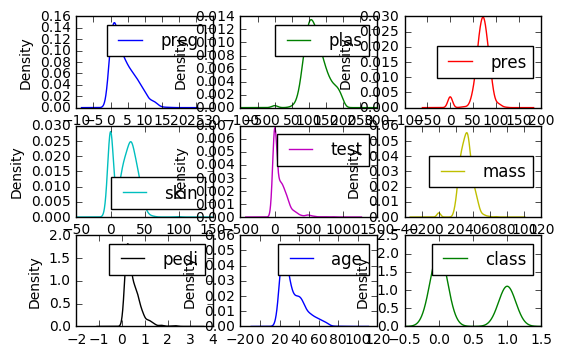

In [2]:
# Univariate Density Plots
from matplotlib import pyplot
from pandas import read_csv
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()


We can see the distribution for each attribute is clearer than the histograms.

#### 6.1.3 Box and Whisker Plots

Another useful way to review the distribution of each attribute is to use Box and Whisker Plots
or boxplots for short. Boxplots summarize the distribution of each attribute, drawing a line for
the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of
the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers
show candidate outlier values (values that are 1.5 times greater than the size of spread of the
middle 50% of the data).


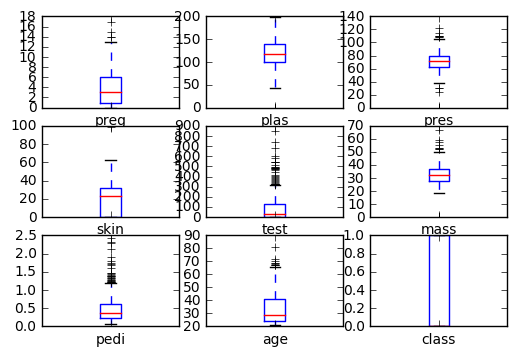

In [3]:
# Box and Whisker Plots
from matplotlib import pyplot
from pandas import read_csv
filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()


We can see that the spread of attributes is quite different. Some like age, test and skin
appear quite skewed towards smaller values.


### 6.2 Multivariate Plots

This section provides examples of two plots that show the interactions between multiple variables
in your dataset.
-  Correlation Matrix Plot.
-  Scatter Plot Matrix.

#### Correlation Matrix Plot

Correlation gives an indication of how related the changes are between two variables. If two
variables change in the same direction they are positively correlated. If they change in opposite
directions together (one goes up, one goes down), then they are negatively correlated. You can
calculate the correlation between each pair of attributes. This is called a correlation matrix. You
can then plot the correlation matrix and get an idea of which variables have a high correlation 
with each other. This is useful to know, because some machine learning algorithms like linear
and logistic regression can have poor performance if there are highly correlated input variables
in your data.


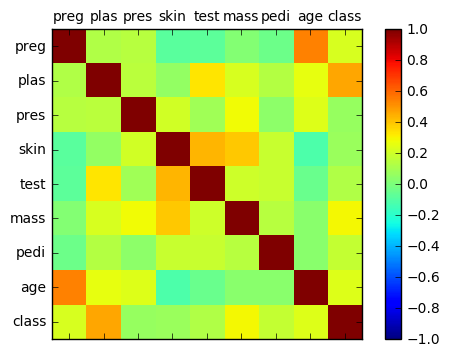

In [1]:
# Correction Matrix Plot
from matplotlib import pyplot
from pandas import read_csv
import numpy
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()



We can see that the matrix is symmetrical, i.e. the bottom left of the matrix is the same as the top right. This is useful as we can see two different views on the same data in one plot. We can also see that each variable is perfectly positively correlated with each other (as you would have expected) in the diagonal line from top left to bottom right.  

The example is not generic in that it specifies the names for the attributes along the axes as well as the number of ticks. This recipe can be made more generic by removing these aspects as follows:


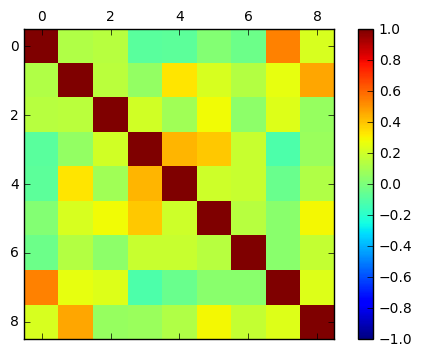

In [2]:
# Correction Matrix Plot (generic)
from matplotlib import pyplot
from pandas import read_csv
import numpy
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()


Generating the plot, you can see that it gives the same information although making it a little harder to see what attributes are correlated by name. Use this generic plot as a first cut to understand the correlations in your dataset and customize it like the first example in order to read off more specific data if needed. 

#### 6.2.2 Scatter Plot Matrix

A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatter plot for each pair of attributes in your data. Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset. 


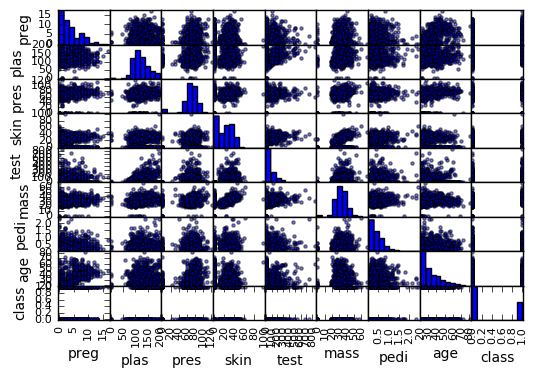

In [3]:
# Scatterplot Matrix
from matplotlib import pyplot
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
scatter_matrix(data)
pyplot.show()



Like the Correlation Matrix Plot above, the scatter plot matrix is symmetrical. This is useful to look at the pairwise relationships from different perspectives. Because there is little point of drawing a scatter plot of each variable with itself, the diagonal shows histograms of each attribute. 

### 6.3 Summary
In this chapter you discovered a number of ways that you can better understand your machine learning data in Python using Pandas. Specifically, you learned how to plot your data using: -  Histograms.
-  Density Plots.
-  Box and Whisker Plots.
-  Correlation Matrix Plot.
-  Scatter Plot Matrix.

#### 6.3.1 Next
Now that you know two ways to learn more about your data, you are ready to start manipulating it. In the next lesson you will discover how you can prepare your data to best expose the structure of your problem to modeling algorithms.



### About the Pima Indian Dataset

#### Attribute Information:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 